In [2]:
from ipynb.fs.defs.functions import *
import numpy as np
import pandas as pd
from math import isnan
from matplotlib import pyplot as plt
from scipy.stats.stats import pearsonr as r
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [3]:
table_2020 = '/Users/ethan/OneDrive - University of Surrey/Coursework/Final Year/FYP/Data/Guardian/Guardian_University_Guide_2020.xlsx'
columns = ['% Satisfied with Teaching','% Satisfied with course','Continuation','Expenditure per student (fte)','Student: staff ratio','Career prospects','Value added score/10','Average Entry Tariff','% Satisfied with Assessment']
df_2020 = pd.read_excel(table_2020, sheet_name='Institution', index_col='Name of Provider')[columns]

In [4]:
table_2019 = '/Users/ethan/OneDrive - University of Surrey/Coursework/Final Year/FYP/Data/Guardian/Guardian_University_Guide_2019_.xlsx'
columns = ['satisfied with teaching (%)','satisfied with course (%)','Continuation','Expenditure per student / 10','Student:staff ratio','Career prospects (%)','Value added score/10','Entry Tariff','satisfied with feedback (%)']
df_2019 = pd.read_excel(table_2019, sheet_name='Institution', index_col='Institution')[columns]

In [5]:
table_2021 = '/Users/ethan/OneDrive - University of Surrey/Coursework/Final Year/FYP/Data/Guardian/Guardian_University_Guide_2021.xlsx'
columns = ['% Satisfied with Teaching','% Satisfied with course','Continuation','Expenditure per student (fte)','Student: staff ratio','Career prospects','Value added score/10','Average Entry Tariff','% Satisfied with Assessment']
df_2021 = pd.read_excel(table_2021, sheet_name='Institution', index_col='Name of Provider')[columns]
df_2021.head()

,% Satisfied with Teaching,% Satisfied with course,Continuation,Expenditure per student (fte),Student: staff ratio,Career prospects,Value added score/10,Average Entry Tariff,% Satisfied with Assessment
Name of Provider,,,,,,,,,
Oxford,NaN,NaN,98.6,10.0,10.3,93,7.1,203,NaN
St Andrews,93.0,94.0,97.4,7.0,11.2,84,6.3,211,80.8
Cambridge,NaN,NaN,98.6,9.9,11.2,93,5.4,212,NaN
Durham,85.3,86.1,97.6,5.9,14.7,89,7.0,188,71.8
London School of Economics,81.6,80.6,96.7,8.9,11.9,93,6.9,170,69.4


In [7]:
df_2019.rename(columns={'satisfied with teaching (%)':'% Satisfied with Teaching','satisfied with course (%)':'% Satisfied with course','Expenditure per student / 10':'Expenditure per student (fte)','Student:staff ratio':'Student: staff ratio','Career prospects (%)':'Career prospects','Entry Tariff':'Average Entry Tariff','satisfied with feedback (%)':'% Satisfied with Assessment'},inplace=True)

In [8]:
df_2021.head()

,% Satisfied with Teaching,% Satisfied with course,Continuation,Expenditure per student (fte),Student: staff ratio,Career prospects,Value added score/10,Average Entry Tariff,% Satisfied with Assessment
Name of Provider,,,,,,,,,
Oxford,NaN,NaN,98.6,10.0,10.3,93,7.1,203,NaN
St Andrews,93.0,94.0,97.4,7.0,11.2,84,6.3,211,80.8
Cambridge,NaN,NaN,98.6,9.9,11.2,93,5.4,212,NaN
Durham,85.3,86.1,97.6,5.9,14.7,89,7.0,188,71.8
London School of Economics,81.6,80.6,96.7,8.9,11.9,93,6.9,170,69.4


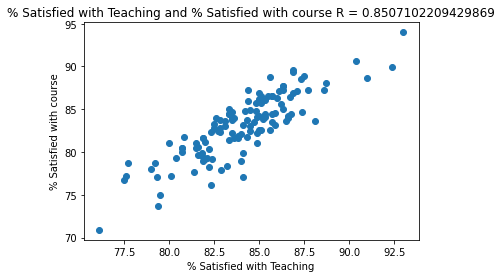

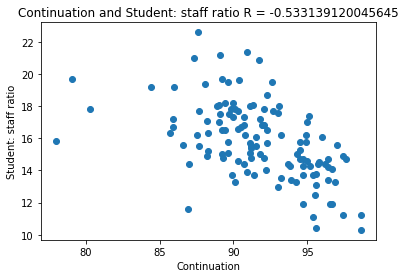

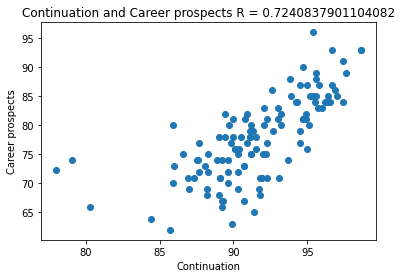

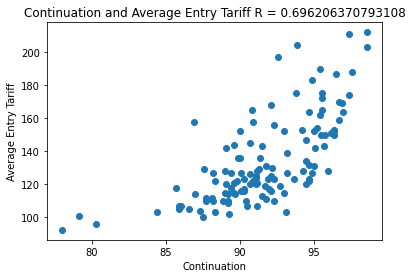

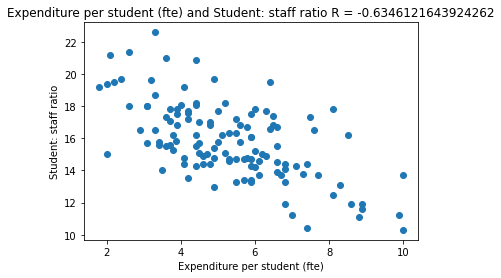

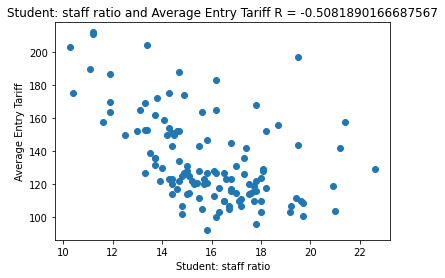

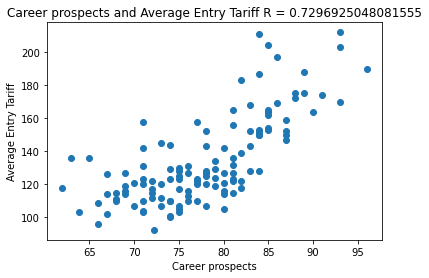

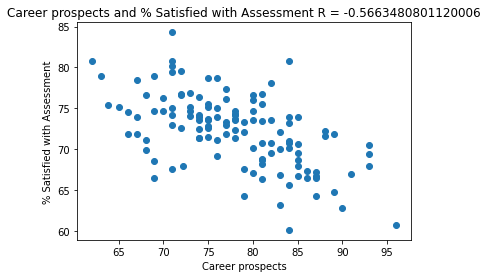

[(('Expenditure per student (fte)', 'Student: staff ratio'),
  -0.6346121643924262),
 (('Career prospects', '% Satisfied with Assessment'), -0.5663480801120006),
 (('Continuation', 'Student: staff ratio'), -0.533139120045645),
 (('Student: staff ratio', 'Average Entry Tariff'), -0.5081890166687567),
 (('Student: staff ratio', 'Career prospects'), -0.48615012203459),
 (('Average Entry Tariff', '% Satisfied with Assessment'),
  -0.4256906450778671),
 (('Continuation', '% Satisfied with Assessment'), -0.37107725323152746),
 (('Expenditure per student (fte)', '% Satisfied with Assessment'),
  -0.3556195270636952),
 (('Value added score/10', '% Satisfied with Assessment'),
  -0.24575215881403967),
 (('% Satisfied with Teaching', 'Student: staff ratio'), -0.20454264940788985),
 (('% Satisfied with course', 'Student: staff ratio'), -0.18045037024840085),
 (('Student: staff ratio', 'Value added score/10'), -0.0889812968306193),
 (('% Satisfied with course', 'Expenditure per student (fte)'),
  

In [9]:
combined = df_2021.combine_first(df_2020.combine_first(df_2019))
n = 1
corrs = {}
for col in combined.columns:
    for i in combined.columns[n:]:
        x = combined.loc[:,col]
        y = combined.loc[:,i]
        corr, err = r(x,y)
        corrs[(col,i)] = corr
        if abs(corr) >= 0.5:
            plt.scatter(x,y)
            plt.title(f'{col} and {i} R = {corr}')
            plt.xlabel(col)
            plt.ylabel(i)
            plt.show()
    n += 1

sorted(corrs.items(), key= lambda item: item[1])

#{key:value for key, value in corrs.items() if 'Value added score/10' in key}

In [10]:
# Volatility
for column in df_2020.columns:
    print(f"{column} -- {compare(df_2020,df_2019,column)[0]}% change")

ValueError: Cannot index with multidimensional key

In [12]:
# Correlation values across 3 years (2019-2021)
years = [df_2019,df_2020,df_2021]
corrs = {}
ns = {}
j = [0 for i in range(36)]
for table in years:
    n = 1
    for col in table.columns:
        for i in table.columns[n:]:
            x = list(table.loc[:,col])
            y = list(table.loc[:,i])
            for index, value in enumerate(x):
                if not isnan(value) and not isnan(y[index]):
                    continue
                else:
                    x.pop(index)
                    y.pop(index)
            corr, err = r(x,y)
            if (col,i) in corrs.keys():
                corrs[(col,i)].append(corr)
            else:
                corrs[(col,i)] = []
                corrs[(col,i)].append(corr)
        n += 1

for elem in corrs:
    corrs[elem] = [np.mean(corrs[elem]), np.std(corrs[elem])]
    
print('Metrics that have high correlation (abs correlation > 0.5)')
for elem in corrs:
    if abs(corrs[elem][0]) > 0.5:
        print(f'{elem} --> {corrs[elem][0]} +/- {corrs[elem][1]}')

print('\n\n\nMetrics with low correlation (abs correlation < 0.2)')
for elem in corrs:
    if abs(corrs[elem][0]) < 0.2:
        print(f'{elem} --> {corrs[elem][0]} +/- {corrs[elem][1]}')

Metrics that have high correlation (abs correlation > 0.5)
('% Satisfied with Teaching', '% Satisfied with course') --> 0.8744574070417371 +/- 0.019188293191353258
('Continuation', 'Student: staff ratio') --> -0.5271159284479476 +/- 0.022392377623745584
('Continuation', 'Career prospects') --> 0.6751422935633347 +/- 0.04243555890441497
('Continuation', 'Average Entry Tariff') --> 0.7176024682685234 +/- 0.019166504510393034
('Expenditure per student (fte)', 'Student: staff ratio') --> -0.6001980390084798 +/- 0.02240323441905453
('Student: staff ratio', 'Average Entry Tariff') --> -0.5172190673540377 +/- 0.012211723983657365
('Career prospects', 'Average Entry Tariff') --> 0.6594411028143763 +/- 0.051342580409336744



Metrics with low correlation (abs correlation < 0.2)
('% Satisfied with Teaching', 'Expenditure per student (fte)') --> -0.07290551958706819 +/- 0.10277646565121383
('% Satisfied with Teaching', 'Student: staff ratio') --> -0.1908422700863778 +/- 0.07970767398594078
('% Sa

In [68]:
# HESA Expenditure data
# NEEDS UPDATING!!!

table_student = '/Users/ethan/OneDrive - University of Surrey/Coursework/Final Year/FYP/Data/HESA/hesa-student-2021.csv'
df_student = pd.read_csv(table_student, index_col='HE provider')[["Total"]]
table_exp = '/Users/ethan/OneDrive - University of Surrey/Coursework/Final Year/FYP/Data/HESA/HESA Academic 18.csv'
columns = ["Academic staff costs","Total expenditure"]
df_exp = pd.read_csv(table_exp, index_col='HE Provider')[columns]
df_student.index.name = "Name of Provider"
df_exp.index.name = "Name of Provider"
df_exp["Students"] = df_student["Total"]
df_exp.replace(',','',regex=True,inplace=True)
df_exp = df_exp[df_exp["Students"].notna()]
# for index in df_student.index:
#     print(index)
#     for i in df_student.columns:
#         print(df_student.loc[index,i])
df_exp = df_exp.astype(int)
df_exp["Total Minus Academic"] = df_exp["Total expenditure"] - df_exp["Academic staff costs"]
df_exp["Expenditure/Student"] = df_exp["Total Minus Academic"] / df_exp["Students"]
df_exp2 = copy_index(df_2021,df_exp)
combined["HESA Expenditure"] = df_exp2["Expenditure/Student"]
combined.head()

,% Satisfied with Teaching,% Satisfied with course,Continuation,Expenditure per student (fte),Student: staff ratio,Career prospects,Value added score/10,Average Entry Tariff,% Satisfied with Assessment,HESA Expenditure
Aberdeen,86.1,87.1,94.9,4.4,16.2,82.0,6.6,183.0,69.5,1.782483
Abertay Dundee,88.7,88.1,89.1,2.1,21.2,71.0,7.0,142.0,80.8,NaN
Aberystwyth,90.4,90.6,91.9,4.8,16.8,71.0,4.8,123.0,84.3,1.684456
Anglia Ruskin,85.1,82.6,87.7,6.3,17.7,77.0,6.6,110.0,76.1,1.968407
Aston,83.5,84.0,96.0,5.9,16.1,83.0,6.4,128.0,70.0,2.103542


Correlation = 0.3294182861092148 +/- 0.0004148957354395089


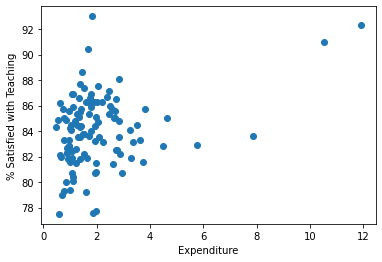

Correlation = 0.22054596102873755 +/- 0.020017958469019097


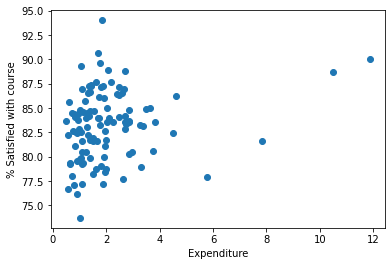

Correlation = 0.510209247958363 +/- 1.0643603049962272e-08


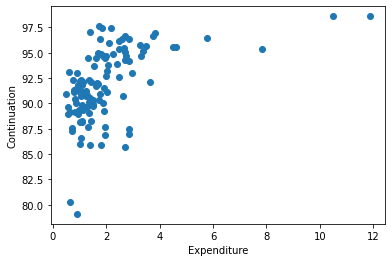

Correlation = 0.7228790974527249 +/- 3.319115145631533e-19


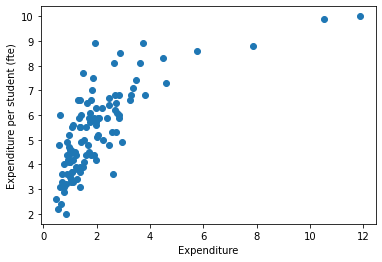

Correlation = -0.5876578160209236 +/- 1.198881541262337e-11


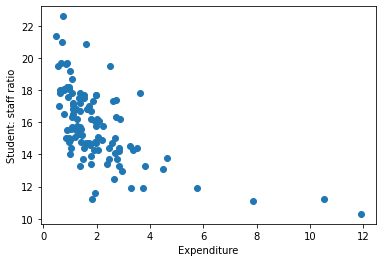

Correlation = 0.5857071321046694 +/- 1.4546532898190447e-11


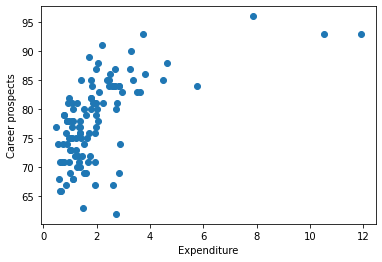

Correlation = 0.21046316820464012 +/- 0.02661200069834386


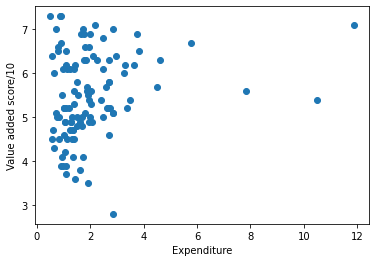

Correlation = 0.6123209671435578 +/- 9.264052530774915e-13


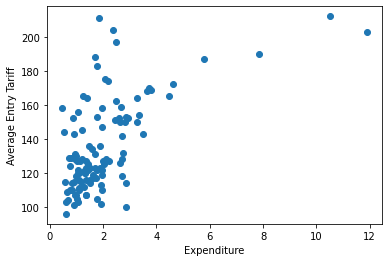

Correlation = -0.4165453578042018 +/- 5.432804901424601e-06


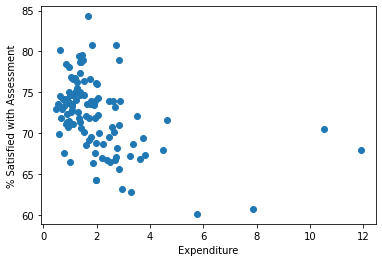

In [14]:
combined_no_nans = combined.dropna(axis=0,how='any')
x = combined_no_nans['HESA Expenditure']
for col in combined_no_nans.columns[:-1]:
    y = list(combined_no_nans[col])
    corr, err = r(x,y)
    print(f'Correlation = {corr} +/- {err}')
    plt.scatter(x,y)
    plt.xlabel('Expenditure')
    plt.ylabel(col)
    plt.show()

In [69]:
# Graduate Outcomes

outcomes_table = '/Users/ethan/OneDrive - University of Surrey/Coursework/Final Year/FYP/Data/HESA/HESA Outcomes.csv'
df_outcomes = pd.read_csv(outcomes_table)
df_outcomes.head()
print (df_outcomes['Provider Name'].isin(df_exp.index))
df_outcomes = df_outcomes[df_outcomes['Provider Name'].isin(df_exp.index)]
df_outcomes.set_index('Provider Name',inplace=True)
df_outcomes = copy_index(df_2021,df_outcomes)
df_outcomes.head()


0       True
1       True
2       True
3       True
4       True
       ...  
411    False
412     True
413    False
414     True
415    False
Name: Provider Name, Length: 416, dtype: bool


,Full-time employment,Part-time employment,Unknown pattern of employment,Voluntary or unpaid work,Employmentand further study,Full-time further study,Part-time further study,Unknown pattern of further study,"Other including travel, caring for someone or retired",Unemployed and due to start work,Unemployed and due to start further study,Unemployed,Total with known outcomes,Non-respondents,Total
Provider Name,,,,,,,,,,,,,,,
AA School of Architecture,40,5,0,0,5,0,0,0,5,0,0,0,60,25,80
Aberdeen,645,95,5,20,130,185,5,0,65,15,0,65,"1,235",805,"2,035"
Abertay University,235,60,0,15,50,35,0,0,20,5,5,25,450,395,845
Aberystwyth,475,115,5,20,130,175,15,0,75,15,5,65,"1,095",615,"1,705"
AECC University College,10,0,0,0,0,0,0,0,0,0,0,0,15,10,30


9


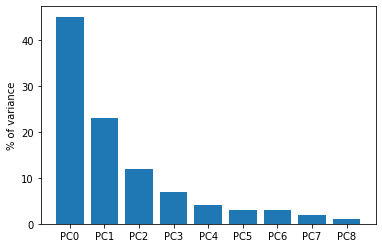

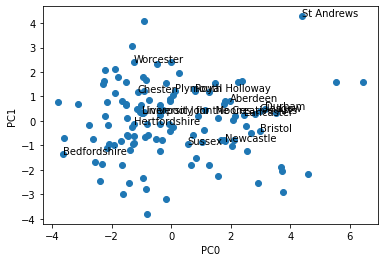

The loading scores for PCA0 are... 

Average Entry Tariff             0.440799
Career prospects                 0.440592
Continuation                     0.419025
Student: staff ratio             0.368766
Expenditure per student (fte)    0.311260
Value added score/10             0.259834
% Satisfied with Assessment      0.250689
% Satisfied with course          0.211418
% Satisfied with Teaching        0.167528
dtype: float64

The loading scores for PCA1 are... 

% Satisfied with Teaching        0.609545
% Satisfied with course          0.585346
% Satisfied with Assessment      0.488801
Expenditure per student (fte)    0.179366
Value added score/10             0.095448
Career prospects                 0.050548
Student: staff ratio             0.047395
Average Entry Tariff             0.024011
Continuation                     0.015424
dtype: float64


In [64]:
# PCA Analysis

pca = PCA()
data = combined.drop(axis=1, labels='HESA Expenditure')  
data['Student: staff ratio'] = 1 / data['Student: staff ratio']
scaled_data = preprocessing.scale(data)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
per_var = np.round(pca.explained_variance_ratio_*100)
print(len(per_var))
labels = ['PC' + str(x) for x in range(len(per_var))]

# Plots

plt.bar(x=range(len(per_var)), height=per_var, tick_label=labels)
plt.ylabel('% of variance')
plt.show()

pca_df = pd.DataFrame(pca_data, index=data.index ,columns=labels)

plt.scatter(pca_df['PC0'], pca_df['PC1'])
plt.xlabel('PC0')
plt.ylabel('PC1')

for index, prov in enumerate(pca_df.index):
    if index % 8 == 0:
        plt.annotate(prov, (pca_df.PC0.loc[prov], pca_df.PC1.loc[prov]))
plt.show()

loading_scores = pd.Series(pca.components_[0], index=data.columns)
sorted_ls = loading_scores.abs().sort_values(ascending=False)
print(f'The loading scores for PCA0 are... \n\n{sorted_ls}\n')
loading_scores = pd.Series(pca.components_[1], index=data.columns)
sorted_ls = loading_scores.abs().sort_values(ascending=False)
print(f'The loading scores for PCA1 are... \n\n{sorted_ls}')


In [52]:
#Import application rates data

apps = pd.read_csv('./Data/UCAS/EOC_applications_main.csv')
apps

,Year,Provider,Main scheme applications
0,2006,A20 University of Aberdeen,14920
1,2006,A30 Abertay University,4660
2,2006,A40 Aberystwyth University,9275
3,2006,"A45 College of Agriculture, Food and Rural Ent...",245
4,2006,A50 American InterContinental University - London,355
...,...,...,...
4743,2019,W85 Writtle University College,825
4744,2019,Y25 Yeovil College University Centre,75
4745,2019,Y50 University of York,25045
4746,2019,Y70 York College,220


In [53]:
apps = apps.pivot_table(index='Provider', columns='Year', values='Main scheme applications')
apps

Year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Provider,,,,,,,,,,,,,,
A10 Abbey College,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN
A11 Amity University [IN] London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
A14 Abingdon and Witney College,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,25.0,NaN,NaN
A20 University of Aberdeen,14920.0,15040.0,13785.0,14705.0,18060.0,19255.0,19535.0,20730.0,19335.0,20770.0,20095.0,19120.0,18840.0,19065.0
A30 Abertay University,4660.0,4540.0,4190.0,4320.0,5345.0,6415.0,6510.0,5530.0,5445.0,4890.0,4725.0,5010.0,5460.0,5485.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Y25 Yeovil College University Centre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,100.0,135.0,115.0,105.0,65.0,75.0
Y50 University of York,20345.0,20105.0,18455.0,21560.0,24585.0,23790.0,23625.0,25075.0,25300.0,25650.0,25955.0,25560.0,23685.0,25045.0
Y70 York College,245.0,240.0,280.0,445.0,585.0,675.0,590.0,575.0,480.0,450.0,410.0,360.0,280.0,220.0


In [80]:
app_per = apps.copy()
for ind, col in enumerate(apps.columns):
    if ind == 0:
         continue
    app_per[col] = ((apps[col] - apps[apps.columns[ind-1]]) / apps[apps.columns[ind-1]]) * 100
app_per = app_per[[x for x in range(2007, 2020)]]
app_per.reset_index(inplace=True)
for i in range(len(app_per['Provider'])):
    app_per.loc[i, 'Provider'] = app_per.loc[i, 'Provider'][4:]
app_per.set_index('Provider', inplace=True)
app_per

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Provider,,,,,,,,,,,,,
Abbey College,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amity University [IN] London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abingdon and Witney College,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.666667,NaN,NaN
University of Aberdeen,0.804290,-8.344415,6.673921,22.815369,6.616833,1.454168,6.117225,-6.729378,7.421774,-3.249880,-4.851953,-1.464435,1.194268
Abertay University,-2.575107,-7.709251,3.102625,23.726852,20.018709,1.480904,-15.053763,-1.537071,-10.192837,-3.374233,6.031746,8.982036,0.457875
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yeovil College University Centre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-16.666667,35.000000,-14.814815,-8.695652,-38.095238,15.384615
University of York,-1.179651,-8.206914,16.824709,14.030612,-3.233679,-0.693569,6.137566,0.897308,1.383399,1.189084,-1.521865,-7.335681,5.742031
York College,-2.040816,16.666667,58.928571,31.460674,15.384615,-12.592593,-2.542373,-16.521739,-6.250000,-8.888889,-12.195122,-22.222222,-21.428571


In [79]:
# Correlation between guardian ranking and applications
ranking_2019 = pd.read_excel(table_2019, sheet_name='Institution', index_col='Institution')['Ranking']

Institution
Cambridge                 1
Oxford                    2
St Andrews                3
Loughborough              4
Durham                    5
                       ... 
London Met              117
Cumbria                 118
York St John            119
Leeds Beckett           120
Bucks New University    121
Name: Ranking, Length: 121, dtype: int64